### Census Data Exploration Part 2

For my project, I'm interested in looking at how race and income compare in more urban settings compared to some more rural areas that had been former mining communities. I'm interested in assessing if displacement occurs more dramatically in communities with a lack of economic diversity. Some indicators of displacement might include becoming more white and higher income, so I'll now move to look at Eagle County, which is West of Denver and encompasses many of the major tourism areas, in the state. I want to explore current race distribution and think about how I could use this to examine displacement down the line for this very different geography.

**Author**: Elise Chessman

In [4]:
# First I'll inport the libraries that I need to read, display, and map my data properly: 
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

Then I'll bring in my race demographics for Eagle County from the census in a geojson format, which I downloaded from [Census Reporter](https://censusreporter.org/).

In [7]:
gdf = gpd.read_file('acs2019_5yr_B03002_15000US080370005034.geojson')

In [8]:
gdf.shape

(30, 45)

Wow ok, so this is much smaller than Eagle County in terms of number of block groups!

In [9]:
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US08037,"Eagle County, CO",54681.0,0.0,38502.0,0.0,36748.0,28.0,615.0,28.0,...,28.0,3955.0,1068.0,329.0,194.0,100.0,105.0,229.0,161.0,"MULTIPOLYGON (((-107.11358 39.49008, -107.1135..."
1,15000US080370001001,"Block Group 1, Eagle, CO",1463.0,299.0,691.0,216.0,691.0,216.0,0.0,12.0,...,12.0,291.0,271.0,16.0,25.0,0.0,12.0,16.0,25.0,"MULTIPOLYGON (((-107.11387 39.62497, -107.1138..."
2,15000US080370002001,"Block Group 1, Eagle, CO",2800.0,735.0,2355.0,618.0,2229.0,599.0,0.0,12.0,...,12.0,0.0,12.0,59.0,85.0,0.0,12.0,59.0,85.0,"MULTIPOLYGON (((-107.06000 39.64067, -107.0584..."
3,15000US080370002002,"Block Group 2, Eagle, CO",2460.0,719.0,1460.0,584.0,1452.0,585.0,0.0,12.0,...,12.0,201.0,281.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-106.96040 39.65207, -106.9596..."
4,15000US080370002003,"Block Group 3, Eagle, CO",2179.0,749.0,1130.0,540.0,1130.0,540.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-106.96252 39.64160, -106.9623..."


I can go ahead and plot my data to get a sense of the geographic data. Looks like Eagle County! 

<AxesSubplot:>

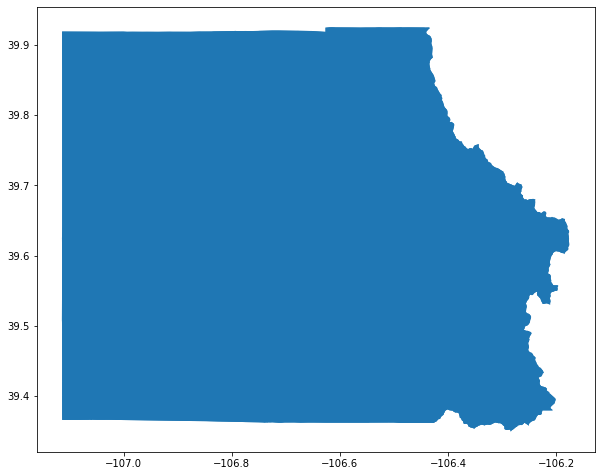

In [10]:
gdf.plot(figsize=(10,10))

Now I want to see of the columns associated with my data, not just a selection. 

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
gdf.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
23,15000US080370005034,"Block Group 4, Eagle, CO",1195.0,559.0,377.0,323.0,169.0,186.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,208.0,266.0,0.0,12.0,208.0,266.0,818.0,501.0,516.0,430.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,302.0,335.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-106.55292 39.66822, -106.5528..."


Now I want to explore the data types that I have, so I'll use .info.

In [13]:
 gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             30 non-null     object  
 1   name              30 non-null     object  
 2   B03002001         30 non-null     float64 
 3   B03002001, Error  30 non-null     float64 
 4   B03002002         30 non-null     float64 
 5   B03002002, Error  30 non-null     float64 
 6   B03002003         30 non-null     float64 
 7   B03002003, Error  30 non-null     float64 
 8   B03002004         30 non-null     float64 
 9   B03002004, Error  30 non-null     float64 
 10  B03002005         30 non-null     float64 
 11  B03002005, Error  30 non-null     float64 
 12  B03002006         30 non-null     float64 
 13  B03002006, Error  30 non-null     float64 
 14  B03002007         30 non-null     float64 
 15  B03002007, Error  30 non-null     float64 
 16  B03002008         30

### Organizing my data

First I'll list all of the column titles  out, so I can start thinking about what I want to keep.

In [15]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

Again, I want to look at race for this first exploration and the story it might tell me about displacement, I'll go ahead and keep similar columns to those that we did in lab. I want to make sure to keep the geographic data, the name of the county, and all of the columns that show something about race. Here are the ones I'll hang on to:

In [16]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [17]:
gdf = gdf[columns_to_keep]
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,05000US08037,"Eagle County, CO",54681.0,38502.0,36748.0,615.0,110.0,357.0,34.0,0.0,638.0,16179.0,"MULTIPOLYGON (((-107.11358 39.49008, -107.1135..."
1,15000US080370001001,"Block Group 1, Eagle, CO",1463.0,691.0,691.0,0.0,0.0,0.0,0.0,0.0,0.0,772.0,"MULTIPOLYGON (((-107.11387 39.62497, -107.1138..."
2,15000US080370002001,"Block Group 1, Eagle, CO",2800.0,2355.0,2229.0,0.0,40.0,0.0,0.0,0.0,86.0,445.0,"MULTIPOLYGON (((-107.06000 39.64067, -107.0584..."
3,15000US080370002002,"Block Group 2, Eagle, CO",2460.0,1460.0,1452.0,0.0,0.0,0.0,0.0,0.0,8.0,1000.0,"MULTIPOLYGON (((-106.96040 39.65207, -106.9596..."
4,15000US080370002003,"Block Group 3, Eagle, CO",2179.0,1130.0,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,1049.0,"MULTIPOLYGON (((-106.96252 39.64160, -106.9623..."


Now I want to make sure that the row for the entire county gets deleted again, so I'll drop row 0 and very that it is deleted.

In [18]:
gdf=gdf.drop([0])
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,15000US080370001001,"Block Group 1, Eagle, CO",1463.0,691.0,691.0,0.0,0.0,0.0,0.0,0.0,0.0,772.0,"MULTIPOLYGON (((-107.11387 39.62497, -107.1138..."
2,15000US080370002001,"Block Group 1, Eagle, CO",2800.0,2355.0,2229.0,0.0,40.0,0.0,0.0,0.0,86.0,445.0,"MULTIPOLYGON (((-107.06000 39.64067, -107.0584..."
3,15000US080370002002,"Block Group 2, Eagle, CO",2460.0,1460.0,1452.0,0.0,0.0,0.0,0.0,0.0,8.0,1000.0,"MULTIPOLYGON (((-106.96040 39.65207, -106.9596..."
4,15000US080370002003,"Block Group 3, Eagle, CO",2179.0,1130.0,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,1049.0,"MULTIPOLYGON (((-106.96252 39.64160, -106.9623..."
5,15000US080370003011,"Block Group 1, Eagle, CO",3047.0,2203.0,2178.0,16.0,0.0,0.0,0.0,0.0,9.0,844.0,"MULTIPOLYGON (((-107.11362 39.39593, -107.1136..."


Now I'll go ahead and rename those columns by what the metadata shows they are actually representing. 

In [19]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White Alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

And I'll check a sample to make sure that rename worked:

In [20]:
gdf.sample()

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
19,15000US080370005022,"Block Group 2, Eagle, CO",2092.0,1674.0,944.0,363.0,0.0,117.0,0.0,0.0,250.0,418.0,"MULTIPOLYGON (((-106.51776 39.55789, -106.5160..."


### Math stuff

To check the math and make sure the data is correct, I'll pull out the total population, and then add the non-hispanic and the hispanic column together to make sure the numbers are the same. I'll start with a random block group: 

In [38]:
random = gdf.sample()
random

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Percent Not Hispanic or Latino,Percent White Alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino
16,15000US080370004033,"Block Group 3, Eagle, CO",4483.0,2795.0,2788.0,7.0,0.0,0.0,0.0,0.0,0.0,1688.0,"MULTIPOLYGON (((-106.90108 39.64017, -106.9010...",62.346643,62.190497,0.156145,0.0,0.0,0.0,0.0,0.0,37.653357


In [39]:
random.iloc[0]['Total']

4483.0

This value is the same as my "total" column in the block group sampled above.
Now to check the math: 

In [40]:
print('Not Hispanic or Latino + Hispanic or Latino: ' + str(random.iloc[0]['Not Hispanic or Latino'] + random.iloc[0]['Hispanic or Latino']))

Not Hispanic or Latino + Hispanic or Latino: 4483.0


They're the same! Looks like everything is good so far. Now I'll check some of the stats for Eagle County: 

In [24]:
# What is the average Hispanic or Latino population for Eagle County's census block groups?
gdf['Hispanic or Latino'].mean()

557.8965517241379

In [25]:
# What about the average white population?
gdf['White Alone'].mean()

1267.1724137931035

I'll look at some summary statistics for black, white, and hispanic populations to get an overall sense:

In [26]:
gdf['Total'].describe()

count      29.000000
mean     1885.551724
std       890.230130
min       462.000000
25%      1195.000000
50%      1828.000000
75%      2271.000000
max      4483.000000
Name: Total, dtype: float64

In [27]:
gdf['White Alone'].describe()

count      29.000000
mean     1267.172414
std       731.020621
min       169.000000
25%       626.000000
50%      1130.000000
75%      1663.000000
max      2925.000000
Name: White Alone, dtype: float64

In [28]:
gdf['Hispanic or Latino'].describe()

count      29.000000
mean      557.896552
std       533.902970
min         0.000000
25%        68.000000
50%       418.000000
75%       844.000000
max      1688.000000
Name: Hispanic or Latino, dtype: float64

In [29]:
gdf['Black or African American alone'].describe()

count     29.000000
mean      21.206897
std       75.482439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      363.000000
Name: Black or African American alone, dtype: float64

These summaries are helpful, but I think a histogram would represent them a lot better. I'll make one for each of the above:

<AxesSubplot:ylabel='Frequency'>

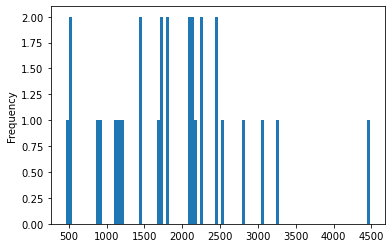

In [31]:
gdf['Total'].plot.hist(bins=100)

This looks very strange. I once again will sort the data from largest to smallest population by block group, and then maybe pull up a few more records to explores the data:

In [32]:
gdf_sortpopulation = gdf.sort_values(by='Total',ascending = False)
gdf_sortpopulation.head(15)

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry
16,15000US080370004033,"Block Group 3, Eagle, CO",4483.0,2795.0,2788.0,7.0,0.0,0.0,0.0,0.0,0.0,1688.0,"MULTIPOLYGON (((-106.90108 39.64017, -106.9010..."
15,15000US080370004032,"Block Group 2, Eagle, CO",3264.0,2925.0,2925.0,0.0,0.0,0.0,0.0,0.0,0.0,339.0,"MULTIPOLYGON (((-106.82992 39.64591, -106.8298..."
5,15000US080370003011,"Block Group 1, Eagle, CO",3047.0,2203.0,2178.0,16.0,0.0,0.0,0.0,0.0,9.0,844.0,"MULTIPOLYGON (((-107.11362 39.39593, -107.1136..."
2,15000US080370002001,"Block Group 1, Eagle, CO",2800.0,2355.0,2229.0,0.0,40.0,0.0,0.0,0.0,86.0,445.0,"MULTIPOLYGON (((-107.06000 39.64067, -107.0584..."
13,15000US080370004022,"Block Group 2, Eagle, CO",2530.0,2247.0,2247.0,0.0,0.0,0.0,0.0,0.0,0.0,283.0,"MULTIPOLYGON (((-106.63982 39.52148, -106.6390..."
3,15000US080370002002,"Block Group 2, Eagle, CO",2460.0,1460.0,1452.0,0.0,0.0,0.0,0.0,0.0,8.0,1000.0,"MULTIPOLYGON (((-106.96040 39.65207, -106.9596..."
21,15000US080370005032,"Block Group 2, Eagle, CO",2455.0,1850.0,1495.0,199.0,70.0,61.0,25.0,0.0,0.0,605.0,"MULTIPOLYGON (((-106.53804 39.65416, -106.5380..."
10,15000US080370004011,"Block Group 1, Eagle, CO",2271.0,626.0,626.0,0.0,0.0,0.0,0.0,0.0,0.0,1645.0,"MULTIPOLYGON (((-106.68600 39.70777, -106.6859..."
12,15000US080370004021,"Block Group 1, Eagle, CO",2270.0,627.0,620.0,0.0,0.0,7.0,0.0,0.0,0.0,1643.0,"MULTIPOLYGON (((-106.69977 39.62962, -106.6994..."
4,15000US080370002003,"Block Group 3, Eagle, CO",2179.0,1130.0,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,1049.0,"MULTIPOLYGON (((-106.96252 39.64160, -106.9623..."


I don't see anything technically off here, but it's good to know that these are just very different counties to be comparing and the stories that this data tells may not actually be representative of the displacement I'm hoping to analyze, especially given the very different population sizes, racial demographics, and even just the total number of block groups.

### Normalizing the Data

I'll start by listing my columns out again so I can think about what I need to plot and have my percentages shown as a part of the total population:

In [33]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Not Hispanic or Latino',
 'White Alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some other race alone',
 'Two or more races',
 'Hispanic or Latino',
 'geometry']

In [34]:
gdf['Percent Not Hispanic or Latino'] = gdf['Not Hispanic or Latino']/gdf['Total']*100
gdf['Percent White Alone'] = gdf['White Alone']/gdf['Total']*100
gdf['Percent Black or African American alone'] = gdf['Black or African American alone']/gdf['Total']*100
gdf['Percent American Indian and Alaska Native alone'] = gdf['American Indian and Alaska Native alone']/gdf['Total']*100
gdf['Percent Asian alone'] = gdf['Asian alone']/gdf['Total']*100
gdf['Percent Native Hawaiian and Other Pacific Islander alone'] = gdf['Native Hawaiian and Other Pacific Islander alone']/gdf['Total']*100
gdf['Percent Some other race alone'] = gdf['Some other race alone']/gdf['Total']*100
gdf['Percent Two or more races'] = gdf['Two or more races']/gdf['Total']*100
gdf['Percent Hispanic or Latino'] = gdf['Hispanic or Latino']/gdf['Total']*100

In [35]:
gdf.head()

,geoid,name,Total,Not Hispanic or Latino,White Alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,geometry,Percent Not Hispanic or Latino,Percent White Alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino
1,15000US080370001001,"Block Group 1, Eagle, CO",1463.0,691.0,691.0,0.0,0.0,0.0,0.0,0.0,0.0,772.0,"MULTIPOLYGON (((-107.11387 39.62497, -107.1138...",47.231716,47.231716,0.000000,0.000000,0.0,0.0,0.0,0.000000,52.768284
2,15000US080370002001,"Block Group 1, Eagle, CO",2800.0,2355.0,2229.0,0.0,40.0,0.0,0.0,0.0,86.0,445.0,"MULTIPOLYGON (((-107.06000 39.64067, -107.0584...",84.107143,79.607143,0.000000,1.428571,0.0,0.0,0.0,3.071429,15.892857
3,15000US080370002002,"Block Group 2, Eagle, CO",2460.0,1460.0,1452.0,0.0,0.0,0.0,0.0,0.0,8.0,1000.0,"MULTIPOLYGON (((-106.96040 39.65207, -106.9596...",59.349593,59.024390,0.000000,0.000000,0.0,0.0,0.0,0.325203,40.650407
4,15000US080370002003,"Block Group 3, Eagle, CO",2179.0,1130.0,1130.0,0.0,0.0,0.0,0.0,0.0,0.0,1049.0,"MULTIPOLYGON (((-106.96252 39.64160, -106.9623...",51.858651,51.858651,0.000000,0.000000,0.0,0.0,0.0,0.000000,48.141349
5,15000US080370003011,"Block Group 1, Eagle, CO",3047.0,2203.0,2178.0,16.0,0.0,0.0,0.0,0.0,9.0,844.0,"MULTIPOLYGON (((-107.11362 39.39593, -107.1136...",72.300624,71.480144,0.525107,0.000000,0.0,0.0,0.0,0.295372,27.699376


In [37]:
percent_random = gdf.sample()
percent_random
list(gdf)

percent_random.iloc[0]
print(percent_random.iloc[0]['Percent White Alone'] + 
      percent_random.iloc[0]['Percent Black or African American alone'] + 
      percent_random.iloc[0]['Percent American Indian and Alaska Native alone'] + 
      percent_random.iloc[0]['Percent Asian alone'] + 
      percent_random.iloc[0]['Percent Native Hawaiian and Other Pacific Islander alone'] +
      percent_random.iloc[0]['Percent Some other race alone'] +
      percent_random.iloc[0]['Percent Two or more races'] +
      percent_random.iloc[0]['Percent Hispanic or Latino'])

100.0


I just want to verify that all of these percentages worked out correctly, so I'll add all of the percent columns to hopefully get 100. Looks right to me!

### Making the maps

Now I'll go ahead and map a few of the race characteristics that I am interested in for Eagle County. I often find that I like how quantiles display so I'll use those, and I'll create maps for the percentages of white alone, Black or African American alone, and Hispanic or Latino populations by block group:

<AxesSubplot:>

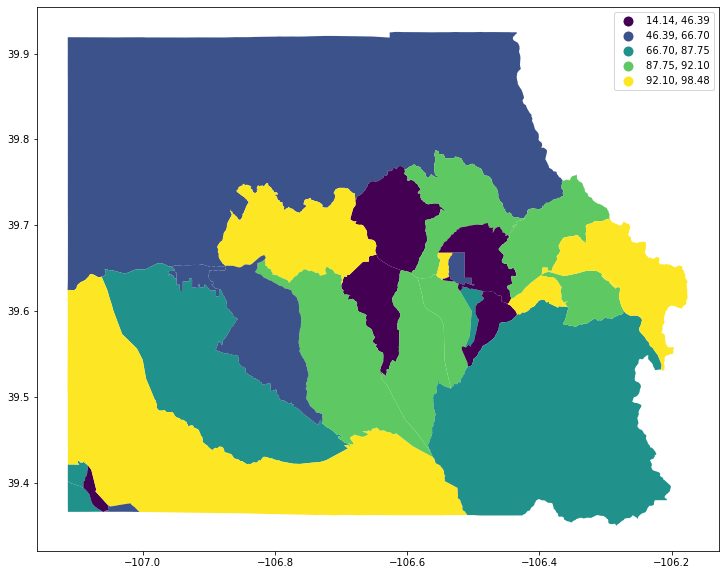

In [41]:
#Start by mapping the Percent white population 
gdf.plot(figsize=(15,10),
                 column='Percent White Alone',
                 legend=True, 
                 scheme='quantiles')

You may have noticed above, but the black population for Eagle county tends to be incredibly small. I probably won't map it for that reason, but just to demonstrate it, here is the percentage column listed out:

In [45]:
gdf['Percent Black or African American alone'].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.5251066622907777,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.15614543832255187,
 0.0,
 0.0,
 17.351816443594647,
 0.0,
 8.10590631364562,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.436426116838488]

These percentages above all seem very small, probably not worth mapping. So for this County, I'll just focus on the comparison between the white and the hispanic populations. 

<AxesSubplot:>

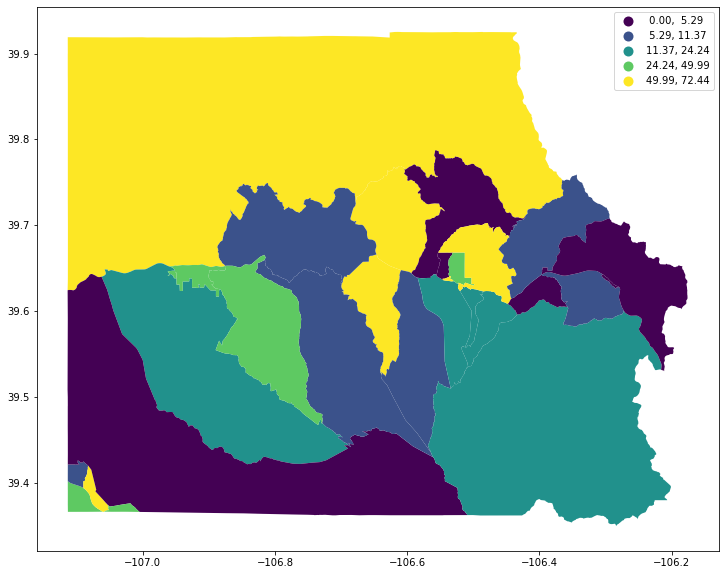

In [47]:

gdf.plot(figsize=(15,10),
                 column='Percent Hispanic or Latino',
                 legend=True, 
                 scheme='quantiles')

This time I'll make two maps side by side:

Text(0.5, 1.0, 'Percent Hispanic')

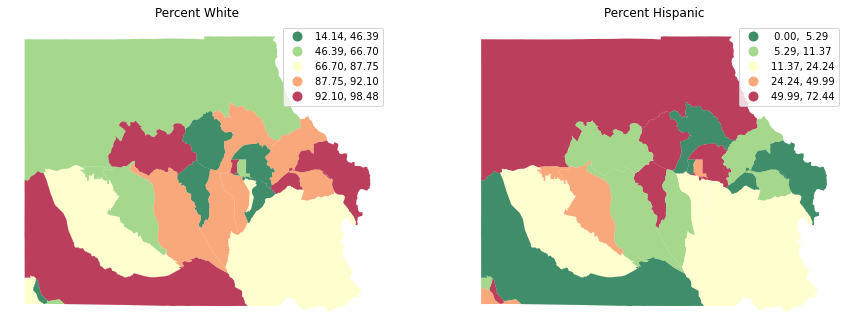

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

gdf.plot(column='Percent White Alone', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent White")

# percent black map on the right
gdf.plot(column='Percent Hispanic or Latino', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, 
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Hispanic")

Since I want to explore displacement in the Latinx community in particular, let's make a web map that shows where this community is in Eagle County. I can then go back in the future and compare this to past ACS data:

In [49]:
#First I'll reproject my data into the web mercator projection: 
gdf_web_mercator = gdf.to_crs(epsg=3857)

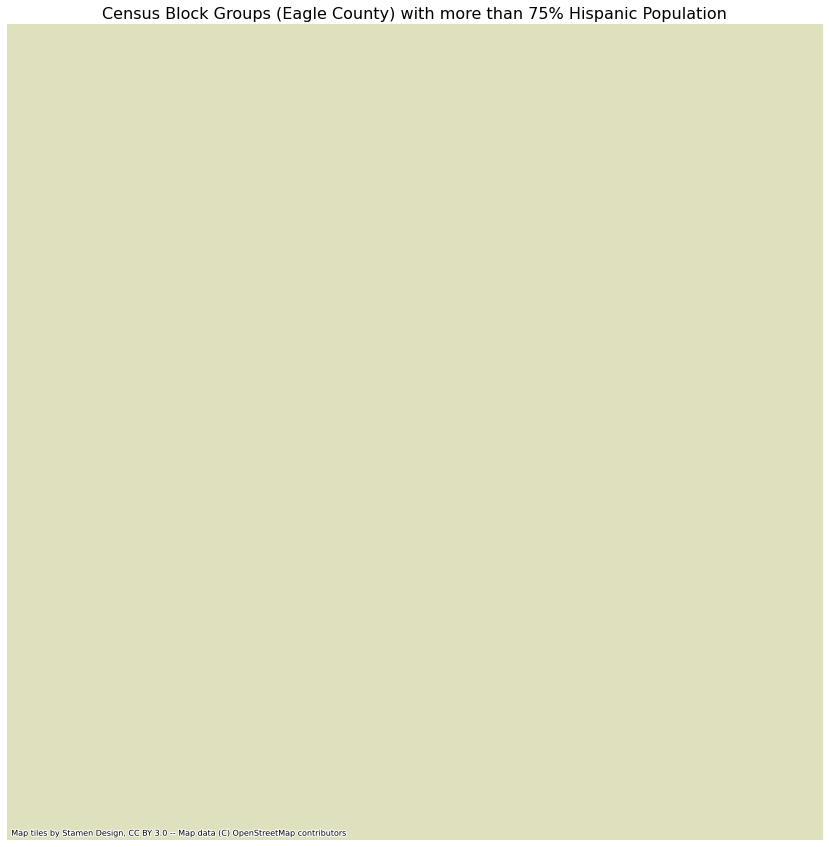

In [51]:
# And then I'll use subplots to create multiple layer maps, and look at where the percent Hispanic population is greater than 75%
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['Percent Hispanic or Latino'] > 75].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Block Groups (Eagle County) with more than 75% Hispanic Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

I sort of expected that this would happen for Eagle, because there are probably very few areas where the Hispanic population is that high. I'll try again at 50%.

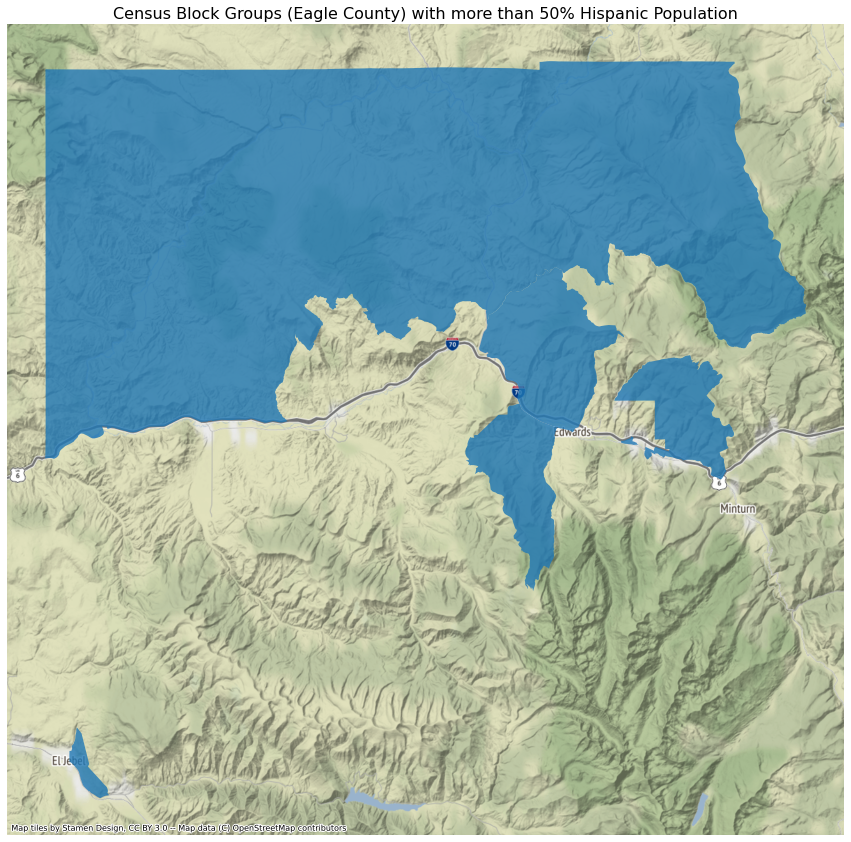

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_web_mercator[gdf_web_mercator['Percent Hispanic or Latino'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Block Groups (Eagle County) with more than 50% Hispanic Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

I definitely have a lot to explore in terms of the differences between these two counties and how to effectively compare them, and also now to look at how these two counties have changed in the past few years. This was nonetheless a great place to start exploring!